# Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import plot_model

from tensorflow.keras.datasets import mnist, imdb, boston_housing

## Standardizing Data

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

We have $404\times13$ 2-dimensional matrix for train data

$$\mathbf{X} _{train}=\left(\begin{matrix}x_{11}^{(train)}&x_{12}^{(train)}&\cdots&x_{1,13}^{(train)}\\x_{21}^{(train)}&x_{22}^{(train)}&\cdots&x_{2,13}^{(train)}\\\vdots&\ddots&\ddots&\vdots\\x_{404,1}^{(train)}&x_{404,2}^{(train)}&\cdots&x_{404,13}^{(train)}\end{matrix}\right)\tag{1}$$

In [3]:
train_data.shape

(404, 13)

We have $102\times13$ 2-dimensional matrix for test data

$$\mathbf{X} _{test}=\left(\begin{matrix}x_{11}^{(test)}&x_{12}^{(test)}&\cdots&x_{1,13}^{(test)}\\x_{21}^{(test)}&x_{22}^{(test)}&\cdots&x_{2,13}^{(test)}\\\vdots&\vdots&\ddots&\vdots\\x_{102,1}^{(test)}&x_{102,2}^{(test)}&\cdots&x_{102,13}^{(test)}\end{matrix}\right)\tag{2}$$

In [4]:
test_data.shape

(102, 13)

Using (1), we can get mean of training data like

$$\bar{x}_{.1}^{(train)}=\frac{1}{404}(x_{11}^{(train)}+x_{21}^{(train)}+\cdots+x_{404}^{(train)})\tag{3}$$

$$\bar{\mathbf{x}}=\left(\begin{matrix}\bar{x}_{.1}&\bar{x}_{.2}&\cdots&\bar{x}_{.13}\end{matrix}\right)\tag{4}$$

In [5]:
mean = train_data.mean(axis=0)

We can standardize data by

$$x_{ij}^{(std)}=\frac{x_{ij}-\bar{x} _{.j}}{s_{j}}\ \forall i=1, 2, \cdots, n, j=1, 2, \cdots, d \tag{5}$$


With (1), (4), we can get

$$\mathbf{X} _{train}-\bar{\mathbf{x}} _{train}=\left(\begin{matrix}x_{11}^{(train)}&x_{12}^{(train)}&\cdots&x_{1,13}^{(train)}\\x_{21}^{(train)}&x_{22}^{(train)}&\cdots&x_{2,13}^{(train)}\\\vdots&\vdots&\ddots&\vdots\\x_{404,1}^{(train)}&x_{404,2}^{(train)}&\cdots&x_{404,13}^{(train)}\end{matrix}\right)-\left(\begin{matrix}\bar{x}_{.1}^{(train)}&\bar{x}_{.2}^{(train)}&\cdots&\bar{x}_{.13}^{(train)}\end{matrix}\right)\tag{6}$$

$$=\left(\begin{matrix}x_{11}^{(train)}-\bar{x}_{.1}^{(train)}&x_{12}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{1,13}^{(train)}-\bar{x}_{.13}^{(train)}\\x_{21}^{(train)}-\bar{x}_{.1}^{(train)}&x_{22}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{2,13}^{(train)}-\bar{x}_{.13}^{(train)}\\\vdots&\vdots&\ddots&\vdots\\x_{404,1}^{(train)}-\bar{x}_{.1}^{(train)}&x_{404,2}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{404,13}^{(train)}-\bar{x}_{.13}^{(train)}\end{matrix}\right)\tag{7}$$

In [6]:
train_data -= mean

Standard deviation of training data can be calculated by

$$s_j^{(train)}=\sqrt{\frac{1}{n_{train}-1}\sum^{n_{train}}_{i=1}(x_{ij}^{(train)}-\bar{x} _{.j}^{(train)})^2}\tag{8}$$

$$\mathbf{s}_{train}=\sqrt{\frac{1}{n_{train}-1}diag((\mathbf{X}^{(train)}-\bar{\mathbf{x}}^{(train)})^T(\mathbf{X}^{(train)}-\bar{\mathbf{x}}^{(train)}))}\tag{9}$$

$$\mathbf{s}_{train}=\left(\begin{matrix}s_1^{(train)}&s_2^{(train)}&\cdots&s_{13}^{(train)}\end{matrix}\right)\tag{10}$$

In [7]:
std = train_data.std(axis=0)

By (6), (10) we can calculate standardized train data as

$$\mathbf{X} _{train}^{(std)}=(\mathbf{X} _{train}-\bar{\mathbf{x}}_{train})⊘\mathbf{s}=\left(\begin{matrix}x_{11}^{(train)}-\bar{x}_{.1}^{(train)}&x_{12}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{113}^{(train)}-\bar{x}_{.13}^{(train)}\\x_{21}^{(train)}-\bar{x}_{.1}^{(train)}&x_{22}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{213}^{(train)}-\bar{x}_{.13}^{(train)}\\\vdots&\vdots&\ddots&\vdots\\x_{4041}^{(train)}-\bar{x}_{.1}^{(train)}&x_{4042}^{(train)}-\bar{x}_{.2}^{(train)}&\cdots&x_{40413}^{(train)}-\bar{x}_{.13}^{(train)}\end{matrix}\right)⊘\left(\begin{matrix}s_1^{(train)}&s_2^{(train)}&\cdots&s_{13}^{(train)}\end{matrix}\right)\tag{11}$$

$$=\left(\begin{matrix}\frac{x_{11}^{(train)}-\bar{x}_{.1}^{(train)}}{s_1^{(train)}}&\frac{x_{12}^{(train)}-\bar{x}_{.2}^{(train)}}{s_2^{(train)}}&\cdots&\frac{x_{113}^{(train)}-\bar{x}_{.13}^{(train)}}{s_{13}^{(train)}}\\\frac{x_{21}^{(train)}-\bar{x}_{.1}^{(train)}}{s_1^{(train)}}&\frac{x_{22}^{(train)}-\bar{x}_{.2}^{(train)}}{s_2^{(train)}}&\cdots&\frac{x_{213}^{(train)}-\bar{x}_{.13}^{(train)}}{s_{13}^{(train)}}\\\vdots&\vdots&\ddots&\vdots\\\frac{x_{4041}^{(train)}-\bar{x}_{.1}^{(train)}}{s_1^{(train)}}&\frac{x_{4042}^{(train)}-\bar{x}_{.2}^{(train)}}{s_2^{(train)}}&\cdots&\frac{x_{40413}^{(train)}-\bar{x}_{.13}^{(train)}}{s_{13}^{(train)}}\end{matrix}\right)\tag{12}$$

In [8]:
train_data /= std

Like (3)-(12), we can get standardized test data as

$$\mathbf{X} _{test}^{(std)}=\left(\begin{matrix}\frac{x_{11}^{(test)}-\bar{x}_{.1}^{(test)}}{s_1^{(test)}}&\frac{x_{12}^{(test)}-\bar{x}_{.2}^{(test)}}{s_2^{(test)}}&\cdots&\frac{x_{113}^{(test)}-\bar{x}_{.13}^{(test)}}{s_{13}^{(test)}}\\\frac{x_{21}^{(test)}-\bar{x}_{.1}^{(test)}}{s_1^{(test)}}&\frac{x_{22}^{(test)}-\bar{x}_{.2}^{(test)}}{s_2^{(test)}}&\cdots&\frac{x_{213}^{(test)}-\bar{x}_{.13}^{(test)}}{s_{13}^{(test)}}\\\vdots&\vdots&\ddots&\vdots\\\frac{x_{102,1}^{(test)}-\bar{x}_{.1}^{(test)}}{s_1^{(test)}}&\frac{x_{102,2}^{(test)}-\bar{x}_{.2}^{(test)}}{s_2^{(test)}}&\cdots&\frac{x_{102,13}^{(test)}-\bar{x}_{.13}^{(test)}}{s_{13}^{(test)}}\end{matrix}\right)\tag{13}$$

In [9]:
test_data -= mean
test_data /= std

## Model Building

On basic model, have input layer like

$$\mathbf{x} _{1\times 13}\tag{14}$$

Among total 2 hidden layer, first layer is

$$\mathbf{h}^{(1)}_{1\times64}=ReLU(\mathbf{W}^{(1)}_{13\times64}\mathbf{x}_{1\times 13}+\mathbf{b}^{(1)}_{1\times64})\tag{15}$$

Second layer is

$$\mathbf{h}^{(2)}_{1\times64}=ReLU(\mathbf{h}^{(1)}_{1\times 64}\mathbf{W}^{(2)}_{64\times64}+\mathbf{b}^{(2)}_{1\times64})\tag{16}$$

ReLU function can be defined by

$$ReLU(x)=max(0, x) \tag{17}$$

Lastly, we can denote output layer as

$$\hat{y}=\mathbf{h}^{(2)}_{1\times64}\mathbf{W}^{(3)}_{64\times1}+b^{3}\tag{18}$$

In [10]:
model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
])

Using root mean square propagation(RMSprop) as the optimizer with mean squared error (MSE) as the loss function. During training, use mean absolute error (MAE) as the evaluation metric.

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y} _i)^2\tag{19}$$

$$MAE=\frac{1}{n}\sum^n_{i=1}|y_i-\hat{y} _i|\tag{20}$$

In [11]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

We can make this model building sequence as a function like

In [12]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

## $k$-fold Cross Validation

We can make algorithm for $k$-fold cross valiation and recording scores like

<hr style="width: 100%; margin-left: 0; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Algorithm</strong> k-fold
<hr style="width: 100%; margin-left: 0; margin-top: 0px; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Input</strong> $404\times 13$ 2-dimensional matrix $\mathbf{X}_{train}$, $404\times1$ vector $\mathbf{y}_{train}$, Number of folds $k=4$, number of epochs $E=300$<br>
&emsp; <strong>Let</strong> all_score ← empty list<br>
&emsp; <strong>Let</strong> $n_{fold}$ ← $404/4=101$
&emsp; <strong>for</strong> $i=0$ <strong>to</strong> $3$ <strong>do</strong><br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{101\times13}^{(val)}$ ← rows [$in_{fold}:(i+1)n_{fold}$ of $\mathbf{X}^{(train)}_{404\times13}$]<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{101\times1}^{(val)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{303\times13}^{(partial)}$ ← rows of $\mathbf{X}_{404\times13}^{(train)}$ excluding fold $i$<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{303\times1}^{(partial)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> model ← build(model)<br>
&emsp;&emsp; <strong>Train</strong>  model on $(\mathbf{X}_{303\times13}^{(partial)}$, $\mathbf{y}_{303\times1}^{(partial)})$ for $E=300$ epochs using RMSprop + MSE<br>

&emsp;&emsp; <strong>Let</strong> $MAE_i$ ← evaluate model on $(\mathbf{X}_{101\times13}^{(partial)}$, $\mathbf{y}_{101\times1}^{(partial)})$<br>
&emsp;&emsp; <strong>Append</strong> $MAE_i$ <strong>to</strong> all_scores<br>

<strong>Output</strong> all_scores$\in \mathbb{R}_{1\times4}$
<hr style="width: 100%; margin-left: 0; margin-top: 0px; border: 0.5px solid black;">

With algorithm, we can apply $k$-fold cross validation on python as

In [13]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 300
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


We can see the validation mean absolute error for all 4 folds by

$$\rm{all\_scores}=\left(\begin{matrix}MAE_1^{(val)}&MAE_2^{(val)}&MAE_3^{(val)}&MAE_4^{(val)}\end{matrix}\right)\tag{21}$$

In [14]:
all_scores

[2.1387999057769775, 2.7152109146118164, 2.570753335952759, 2.2822794914245605]

Last, we can get final mean of validation mean absolute error for all 4 folds. However, this value is only final output of our model, we can't check whether it is overfitted or underfitted

In [15]:
np.mean(all_scores)

2.4267609119415283

<hr style="width: 100%; margin-left: 0; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Algorithm</strong> k-fold with history
<hr style="width: 100%; margin-left: 0; margin-top: 0px; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Input</strong> $404\times 13$ 2-dimensional matrix $\mathbf{X}_{train}$, $404\times1$ vector $\mathbf{y}_{train}$, Number of folds $k=4$, number of epochs $E=300$<br>
&emsp; <strong>Let</strong> all_mae_histories ← empty list<br>
&emsp; <strong>Let</strong> $n_{fold}$ ← $404/4=101$
&emsp; <strong>for</strong> $i=0$ <strong>to</strong> $3$ <strong>do</strong><br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{101\times13}^{(val)}$ ← rows [$in_{fold}:(i+1)n_{fold}$ of $\mathbf{X}^{(train)}_{404\times13}$]<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{101\times1}^{(val)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> $\mathbf{X}_{303\times13}^{(partial)}$ ← rows of $\mathbf{X}_{404\times13}^{(train)}$ excluding fold $i$<br>
&emsp;&emsp; <strong>Let</strong> $\mathbf{y}_{303\times1}^{(partial)}$ ← corresponding rows of $\mathbf{y}_{404\times1}^{(train)}$<br>

&emsp;&emsp; <strong>Let</strong> model ← build(model)<br>
&emsp;&emsp; <strong>Train</strong>  model on $(\mathbf{X}_{303\times13}^{(partial)}$, $\mathbf{y}_{303\times1}^{(partial)})$ for $E=300$ epochs using RMSprop + MSE<br>

&emsp;&emsp; <strong>Let</strong> mae_history ← validation MAE for each epoch<br>
&emsp;&emsp; <strong>Append</strong> mae_history <strong>to</strong> all_mae_histories<br>

<strong>Output</strong> all_mae_histories$\in \mathbb{R}_{4\times300}$
<hr style="width: 100%; margin-left: 0; margin-top: 0px; border: 0.5px solid black;">

With algorithm, we can apply $k$-fold cross validation with history on python as

In [16]:
num_epochs = 300
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=100, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


As shown in the pseudocode, all_mae_histories have validation $MAE$ over 300 epochs for each of 4 folds. We can denote all_mae_histories as

$$\rm{all\_mae\_histories}=\left(\begin{matrix}\rm{mae\_history}^{(1)}\\\rm{mae\_history}^{(2)}\\\rm{mae\_history}^{(3)}\\\rm{mae\_history}^{(4)}\\\end{matrix}\right)\tag{22}$$

On (22), each mae_history can be denoted by

$$\rm{mae\_history}^{(1)}=\left(\begin{matrix}MAE_{1}^{(1)}&MAE_{2}^{(1)}&\cdots&MAE_{300}^{(1)}\end{matrix}\right)\tag{23}$$

With (22), (23), all_mae_histories can be denoted by

$$\rm{all\_mae\_histories}=\left(\begin{matrix}MAE_{1}^{(1)}&MAE_{2}^{(1)}&\cdots&MAE_{300}^{(1)}\\MAE_{1}^{(2)}&MAE_{2}^{(2)}&\cdots&MAE_{300}^{(2)}\\MAE_{1}^{(3)}&MAE_{2}^{(3)}&\cdots&MAE_{300}^{(3)}\\MAE_{1}^{(4)}&MAE_{2}^{(4)}&\cdots&MAE_{300}^{(4)}\\\end{matrix}\right)\tag{24}$$

In [17]:
np.array(all_mae_histories).shape

(4, 300)

We can get mean of validation $MAE$ on fold #3, mean of 300 epochs

In [18]:
np.array(all_mae_histories[0]).mean(axis=0)

3.139408590396245

We can get mean of validation $MAE$ of 0th epoch on each folds

In [19]:
np.mean([x[0] for x in all_mae_histories])

21.56889533996582

We can get the mean of validation MAE across the 4 folds for each epoch

In [20]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

By plotting the average validation MAE over epochs, we can see model’s generalization performance

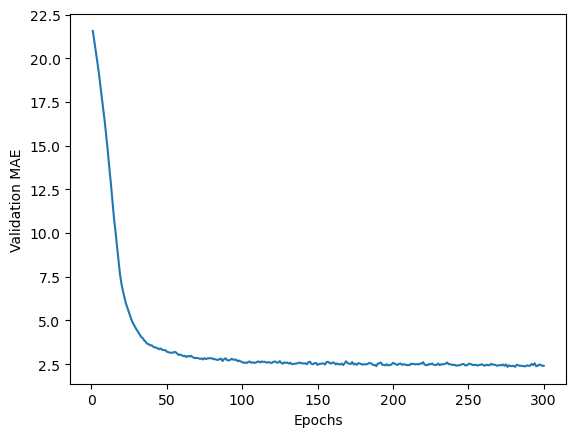

In [21]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

To reduce effect of high variance in initial epoches, omit first 10 epochs of validation MAE.

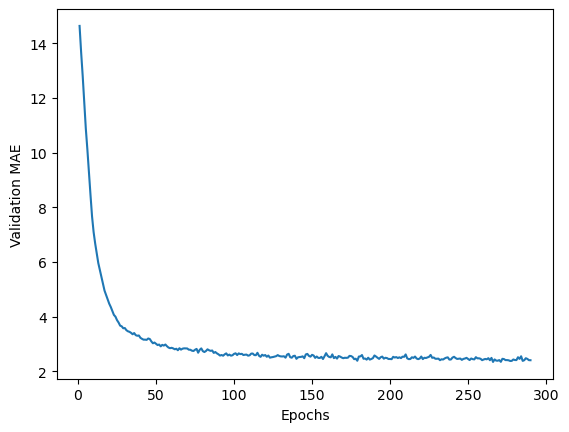

In [22]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

By the plot made before, we can get optimal epochs, in this time we set epochs=130 with batch size=16

In [23]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.4519 - mae: 2.3136 


In [24]:
test_mae_score

2.4858882427215576

In [25]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([8.741521], dtype=float32)

## Load data

Load MNIST data

In [26]:
(train_images, train_labels), _ = mnist.load_data()

In MNIST data, we have total 60,000 $28\times28$ pixels hand written digits like

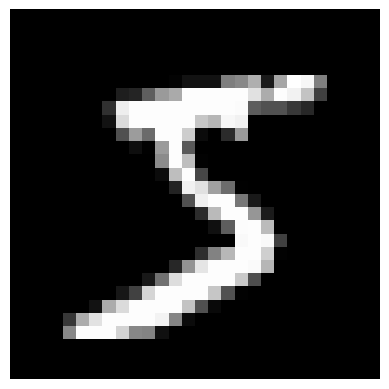

In [27]:
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

We can denote this $28\times28$ picture as $28\times28$ 2-dimensional matrix

$$\mathbf{X}=\left(\begin{matrix}x_{11}&x_{12}&\cdots&x_{1,28}\\x_{21}&x_{22}&\cdots&x_{2,28}\\\vdots&\vdots&\ddots&\vdots\\x_{28,1}&x_{28,2}&\cdots&x_{28,28}\end{matrix}\right)\tag{26}$$

For matrix operations, transform $28\times28$ matrix into $784\times1$ vector

$$\mathbf{X}'=\left(\begin{matrix}x_{11}&x_{12}&\cdots&x_{1,28}&x_{21}&x_{22}&\cdots&x_{2,28}&\cdots&x_{28,28}\end{matrix}\right)$$

In [28]:
train_images = train_images.reshape((60000, 28 * 28))

When we visualize picture we just saw after transformation, 

In [29]:
plt.figure(figsize=(20,5))
plt.imshow(train_images[0].reshape(1, 784), cmap='gray')
plt.axis('off')
plt.show()

For faster training, normalize each pixel value (0–255) to the 0–1

In [30]:
train_images = train_images.astype("float32") / 255

## Effect of Noise

Add random noise to MNIST data

In [31]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

We can see that random noise image part was added after the orginal image

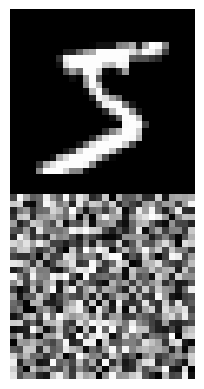

In [32]:
plt.imshow(train_images_with_noise_channels[0].reshape(56, 28), cmap='gray')
plt.axis('off')
plt.show()

Add all-zero data to MNIST data, this time, added part don't have much effect on original data

In [33]:
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

We can see that the all-zero(black) image was added after the orginal image

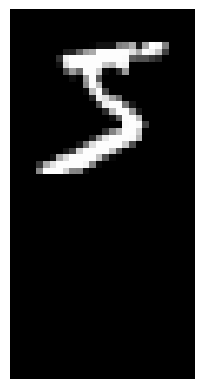

In [34]:
plt.imshow(train_images_with_zeros_channels[0].reshape(56, 28), cmap='gray')
plt.axis('off')
plt.show()

Make model with 1 hidden layer

In [35]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

Train model with white-noise(random noise)

In [36]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6944 - loss: 1.0763 - val_accuracy: 0.9240 - val_loss: 0.2629
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9122 - loss: 0.2852 - val_accuracy: 0.9446 - val_loss: 0.1914
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9444 - loss: 0.1777 - val_accuracy: 0.9236 - val_loss: 0.2298
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9619 - loss: 0.1225 - val_accuracy: 0.9223 - val_loss: 0.2500
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9685 - loss: 0.0947 - val_accuracy: 0.9607 - val_loss: 0.1321
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9794 - loss: 0.0651 - val_accuracy: 0.9579 - val_loss: 0.1469
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9845 - loss: 0.0500 - val_accuracy: 0.9574 - val_loss: 0.1497
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9893 - loss: 0.0342 - val_accu

Train model with all-zero  data

In [37]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8603 - loss: 0.4910 - val_accuracy: 0.9561 - val_loss: 0.1590
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9611 - loss: 0.1353 - val_accuracy: 0.9678 - val_loss: 0.1074
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9755 - loss: 0.0845 - val_accuracy: 0.9735 - val_loss: 0.0874
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9834 - loss: 0.0557 - val_accuracy: 0.9769 - val_loss: 0.0777
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9877 - loss: 0.0432 - val_accuracy: 0.9754 - val_loss: 0.0837
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9906 - loss: 0.0320 - val_accuracy: 0.9782 - val_loss: 0.0749
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9930 - loss: 0.0246 - val_accuracy: 0.9782 - val_loss: 0.0754
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9960 - loss: 0.0169 - val_accu

When we compare model with random noise and all-zero data, model with random noise's validation accuracy is lower than model with all-zero data. We can see that the noise on data affact the model's performance

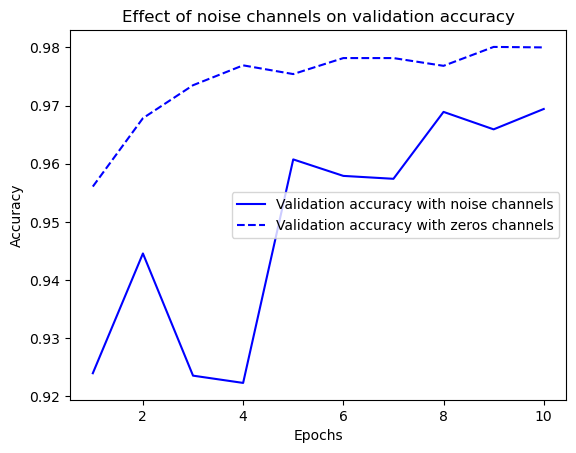

In [38]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Effect of Model's Label

Load MNIST data again

In [39]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

We can wonder whether the model is simply memorizing the data with label. So this time, we will shuffle the data and label.

In [40]:
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

When we check first image by visualizing, we can see there is 5

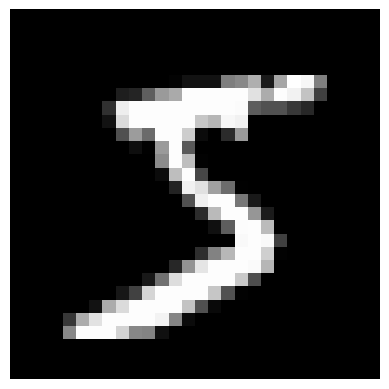

In [41]:
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

However, when we check the label, it said it's 8. Like this, labels of images was randomly shuffled, and if model just memorized the data with label, the accuracy will be good. However, if the model actually learn the data's pattern with label, than the perfromance will be extremely bad.

In [42]:
random_train_labels[0]

6

As we done before, make same model

In [43]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

This time, accuracy decreased below the 0.6, and validation loss continuously increased. This means that the model actually learn the pattern of data, not just memorizing the label with data

In [44]:
model.fit(train_images, random_train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1026 - loss: 2.3272 - val_accuracy: 0.0998 - val_loss: 2.3070
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1187 - loss: 2.2976 - val_accuracy: 0.0973 - val_loss: 2.3111
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1312 - loss: 2.2876 - val_accuracy: 0.1049 - val_loss: 2.3184
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1375 - loss: 2.2774 - val_accuracy: 0.1020 - val_loss: 2.3251
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1529 - loss: 2.2585 - val_accuracy: 0.0968 - val_loss: 2.3329
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1718 - loss: 2.2372 - val_accuracy: 0.1024 - val_loss: 2.3525
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1871 - loss: 2.2109 - val_accuracy: 0.0977 - val_loss: 2.3699
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2077 - loss: 2.1834 - val_accur

## Effect of Model's Learning Rate

Load MNIST data again

In [45]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

As we done before, make same model

In [46]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In this time, we set very high learning rate($\eta=1$)

In [47]:
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

We can see that value of accuracy, loss are unstable and very poor

In [48]:
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4686 - loss: 2911.9028 - val_accuracy: 0.2532 - val_loss: 1.9786
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2339 - loss: 3.4126 - val_accuracy: 0.2524 - val_loss: 3.5152
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2264 - loss: 2.5367 - val_accuracy: 0.2431 - val_loss: 4.2373
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2155 - loss: 2.5227 - val_accuracy: 0.2097 - val_loss: 52.3167
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2244 - loss: 2.9307 - val_accuracy: 0.2052 - val_loss: 2.2843
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2023 - loss: 2.3372 - val_accuracy: 0.1856 - val_loss: 2.1830
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1958 - loss: 2.3657 - val_accuracy: 0.2002 - val_loss: 2.1525
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2331 - loss: 2.3456 - val_a

In [49]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Setting learning rate $\eta=0.01$

In [50]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Unlike previous case, model well fitted

In [51]:
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8352 - loss: 0.7330 - val_accuracy: 0.9594 - val_loss: 0.1430
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9625 - loss: 0.1265 - val_accuracy: 0.9615 - val_loss: 0.1426
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9740 - loss: 0.0951 - val_accuracy: 0.9574 - val_loss: 0.1893
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9788 - loss: 0.0764 - val_accuracy: 0.9678 - val_loss: 0.1617
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9823 - loss: 0.0623 - val_accuracy: 0.9666 - val_loss: 0.1950
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9856 - loss: 0.0564 - val_accuracy: 0.9706 - val_loss: 0.1976
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9873 - loss: 0.0525 - val_accuracy: 0.9720 - val_loss: 0.1902
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9878 - loss: 0.0482 - val_accur

## Effect of Model's Layer

Small model without hidden layer, model with just input layer and output layer. It is simple layer, but it still has high accuracy and fitted well

In [52]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7352 - loss: 1.0412 - val_accuracy: 0.9031 - val_loss: 0.3592
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9011 - loss: 0.3623 - val_accuracy: 0.9158 - val_loss: 0.3106
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9102 - loss: 0.3260 - val_accuracy: 0.9188 - val_loss: 0.2907
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9148 - loss: 0.3028 - val_accuracy: 0.9218 - val_loss: 0.2843
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9182 - loss: 0.2948 - val_accuracy: 0.9234 - val_loss: 0.2776
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9212 - loss: 0.2813 - val_accuracy: 0.9238 - val_loss: 0.2762
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9228 - loss: 0.2778 - val_accuracy: 0.9265 - val_loss: 0.2715
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9235 - loss: 0.2762 - val_accuracy: 0.

Even though model fitted well without overfitting, it doesn't have any hidden layer, the accuracy cannot be improved significantly

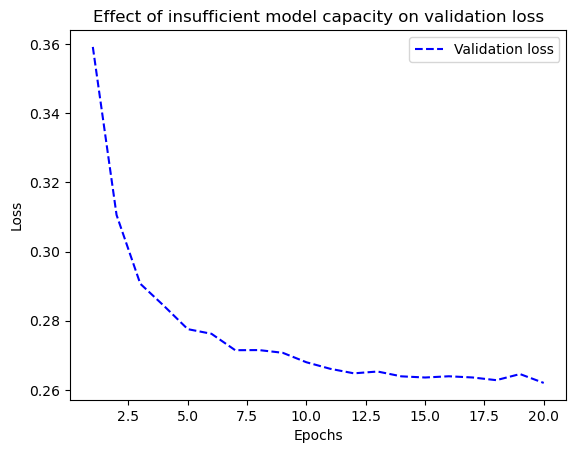

In [53]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

This time, we have more complex model with 2 hidden layers, accuracy is very high but, validation loss increased slightly, it can be little bit overfitted

In [54]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8277 - loss: 0.6171 - val_accuracy: 0.9468 - val_loss: 0.1852
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9470 - loss: 0.1821 - val_accuracy: 0.9611 - val_loss: 0.1366
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9643 - loss: 0.1202 - val_accuracy: 0.9649 - val_loss: 0.1206
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9729 - loss: 0.0905 - val_accuracy: 0.9689 - val_loss: 0.1056
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9780 - loss: 0.0747 - val_accuracy: 0.9716 - val_loss: 0.0980
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9816 - loss: 0.0596 - val_accuracy: 0.9732 - val_loss: 0.0912
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9863 - loss: 0.0467 - val_accuracy: 0.9735 - val_loss: 0.0932
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9876 - loss: 0.0415 - val_accuracy: 0.

## Effect of Network's size

Load top 10,000 words from IMDb data

In [61]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

Like one-hot encoding, transform data

In [62]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7048 - loss: 0.5883 - val_accuracy: 0.8676 - val_loss: 0.3779
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8953 - loss: 0.3212 - val_accuracy: 0.8845 - val_loss: 0.3065
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9233 - loss: 0.2335 - val_accuracy: 0.8881 - val_loss: 0.2813
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9447 - loss: 0.1832 - val_accuracy: 0.8866 - val_loss: 0.2840
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9490 - loss: 0.1574 - val_accuracy: 0.8889 - val_loss: 0.2793
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9595 - loss: 0.1295 - val_accuracy: 0.8877 - val_loss: 0.2924
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9679 - loss: 0.1113 - val_accuracy: 0.8822 - val_loss: 0.3129
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9759 - loss: 0.0902 - val_accuracy: 0.8831 - v

Small model, model can be underfitted

In [56]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7045 - loss: 0.6289 - val_accuracy: 0.8479 - val_loss: 0.4959
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8733 - loss: 0.4531 - val_accuracy: 0.8665 - val_loss: 0.4021
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8961 - loss: 0.3539 - val_accuracy: 0.8795 - val_loss: 0.3464
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9101 - loss: 0.2930 - val_accuracy: 0.8841 - val_loss: 0.3145
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9243 - loss: 0.2479 - val_accuracy: 0.8835 - val_loss: 0.3008
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9299 - loss: 0.2174 - val_accuracy: 0.8851 - val_loss: 0.2868
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9383 - loss: 0.1945 - val_accuracy: 0.8860 - val_loss: 0.2813
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9468 - loss: 0.1694 - val_accuracy: 0.8909 - v

Large model, model can be overfitted

In [57]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.6493 - loss: 0.6431 - val_accuracy: 0.8102 - val_loss: 0.4189
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.8582 - loss: 0.3384 - val_accuracy: 0.8855 - val_loss: 0.2931
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9218 - loss: 0.2202 - val_accuracy: 0.8479 - val_loss: 0.3546
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9285 - loss: 0.1846 - val_accuracy: 0.8592 - val_loss: 0.3436
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9473 - loss: 0.1413 - val_accuracy: 0.8523 - val_loss: 0.3733
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9673 - loss: 0.0977 - val_accuracy: 0.8527 - val_loss: 0.4246
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9728 - loss: 0.0825 - val_accuracy: 0.8871 - val_loss: 0.3177
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9913 - loss: 0.0395 - val_accuracy: 0.8852 - v

Used L2 regularization to avoid overfitting, but accuracy may be decreased

In [58]:
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7065 - loss: 0.6890 - val_accuracy: 0.8393 - val_loss: 0.4944
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8865 - loss: 0.4312 - val_accuracy: 0.8819 - val_loss: 0.3977
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9170 - loss: 0.3364 - val_accuracy: 0.8873 - val_loss: 0.3668
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9302 - loss: 0.2936 - val_accuracy: 0.8773 - val_loss: 0.3745
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9328 - loss: 0.2755 - val_accuracy: 0.8885 - val_loss: 0.3551
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9434 - loss: 0.2539 - val_accuracy: 0.8775 - val_loss: 0.3751
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9494 - loss: 0.2377 - val_accuracy: 0.8859 - val_loss: 0.3564
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9526 - loss: 0.2271 - val_accuracy: 0.8835 - v

We can use L1 regularization, or L1 and L2 regularization together, but but accuracy may be decreased

In [59]:
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

Used dropout to avoid overfitting, but accuracy may be decreased

In [60]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5903 - loss: 0.6643 - val_accuracy: 0.8377 - val_loss: 0.5220
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7489 - loss: 0.5355 - val_accuracy: 0.8718 - val_loss: 0.4062
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8186 - loss: 0.4424 - val_accuracy: 0.8805 - val_loss: 0.3351
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8543 - loss: 0.3796 - val_accuracy: 0.8870 - val_loss: 0.3023
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8824 - loss: 0.3243 - val_accuracy: 0.8898 - val_loss: 0.2866
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9017 - loss: 0.2824 - val_accuracy: 0.8897 - val_loss: 0.2740
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9150 - loss: 0.2530 - val_accuracy: 0.8898 - val_loss: 0.2763
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9299 - loss: 0.2177 - val_accuracy: 0.8895 - v